<a href="https://colab.research.google.com/github/Kumarmaanx/weather_report/blob/main/Final__Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
from sklearn.preprocessing import MinMaxScaler

file_path = "//data for weather.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
else:
    print("Error: File not found.")
    exit()

df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)

df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

joblib.dump(scaler, "scaler.pkl")

df_scaled = pd.DataFrame(df, columns=df.columns, index=df.index)
df_scaled.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.085859,0.124343,0.003529,0.067365,0.040933,0.023681,0.034926,0.029114,0.182439,0.015398,...,NaN,0.126050,0.806818,0.244898,0.594366,0.000000,0.0,0.004082,0.900000,0.512108
2020-01-01 00:15:00,0.085859,0.124343,0.004705,0.058557,0.036715,0.023681,0.046739,0.028074,0.172927,0.015677,...,NaN,0.128151,0.806818,0.255102,0.661972,0.000000,0.0,0.004082,0.900000,0.512108
2020-01-01 00:30:00,0.057525,0.124343,0.042104,0.083508,0.081995,0.033894,0.062051,0.016650,0.054066,0.007134,...,NaN,0.355914,0.785376,0.149652,0.584333,0.000548,0.0,0.158448,0.669151,0.512108
2020-01-01 00:45:00,0.092172,0.124343,0.007292,0.076648,0.049119,0.019942,0.045198,0.030933,0.132195,0.013438,...,NaN,0.128151,0.806818,0.295918,0.766197,0.000000,0.0,0.004082,0.885714,0.512108
2020-01-01 01:00:00,0.092172,0.124343,0.006587,0.068079,0.043662,0.023473,0.044684,0.030413,0.139756,0.013438,...,NaN,0.126050,0.806818,0.285714,0.687324,0.000000,0.0,0.004082,0.885714,0.512108


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/AT .csv")  # Replace with actual file path
df.columns = ["Date", "AT"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["AT"].fillna(df["AT"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["AT"] = scaler.fit_transform(df[["AT"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["AT"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

# Reshape input to be 3D (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

# Define Bidirectional LSTM model
def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('AT')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

# Generate confusion matrix
def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # 1 if increase, 0 if decrease
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class),accuracy_score(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1,accuracy_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")
print(f"Accuracy Score - One Day Ahead Prediction: {accuracy_1:.2f}")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value AT": y_pred_1_inv.flatten(),
    "Actual value AT": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_AT.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value AT": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_AT.csv", index=False)


In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("//data for weather.csv")  # Change this to your actual dataset filename

# Ensure the Timestamp column is properly formatted
# Removed dayfirst=True as the format is already Year-Month-Day
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format='%Y-%m-%d %H:%M:%S')  # Explicitly specify the format

# Iterate through each column and save as separate CSV
for column in df.columns:
    if column != "Timestamp":
        single_column_df = df[["Timestamp", column]]
        # Replace invalid characters in filename with underscores
        filename = f"{column.replace('/', '_').replace('(', '_').replace(')', '_')}.csv"
        single_column_df.to_csv(filename, index=False)
        print(f"Saved: {filename}")

print("All files have been saved successfully.")

Saved: PM2.5 _µg_m³_.csv
Saved: PM10 _µg_m³_.csv
Saved: NO _µg_m³_.csv
Saved: NO2 _µg_m³_.csv
Saved: NOx _ppb_.csv
Saved: NH3 _µg_m³_.csv
Saved: SO2 _µg_m³_.csv
Saved: CO _mg_m³_.csv
Saved: Ozone _µg_m³_.csv
Saved: Benzene _µg_m³_.csv
Saved: Toluene _µg_m³_.csv
Saved: Xylene _µg_m³_.csv
Saved: O Xylene _µg_m³_.csv
Saved: Eth-Benzene _µg_m³_.csv
Saved: MP-Xylene _µg_m³_.csv
Saved: AT _°C_.csv
Saved: RH _%_.csv
Saved: WS _m_s_.csv
Saved: WD _deg_.csv
Saved: RF _mm_.csv
Saved: TOT-RF _mm_.csv
Saved: SR _W_mt2_.csv
Saved: BP _mmHg_.csv
Saved: VWS _m_s_.csv
All files have been saved successfully.


In [ ]:
#NOW PM2.5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/PM2.5 .csv")  # Replace with actual file path
df.columns = ["Date", "PM2.5"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["PM2.5"].fillna(df["PM2.5"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["PM2.5"] = scaler.fit_transform(df[["PM2.5"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["PM2.5"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('PM2.5')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value PM2.5": y_pred_1_inv.flatten(),
    "Actual value PM2.5": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_PM2.5.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value PM2.5": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_PM2.5.csv", index=False)


In [ ]:
#RAIN FALL

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/TOT-RF _mm_.csv")  # Replace with actual file path
df.columns = ["Date", "TOT-RF"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["TOT-RF"].fillna(df["TOT-RF"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["TOT-RF"] = scaler.fit_transform(df[["TOT-RF"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["TOT-RF"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

# Reshape input to be 3D (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

# Define Bidirectional LSTM model
def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('TOT-RF')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

# Generate confusion matrix
def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # 1 if increase, 0 if decrease
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value TOT-RF": y_pred_1_inv.flatten(),
    "Actual value TOT-RF": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_TOT-RF.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value TOT-RF": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_TOT-RF.csv", index=False)


In [ ]:
#PM1.10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/PM10 .csv")  # Replace with actual file path
df.columns = ["Date", "PM10"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["PM10"].fillna(df["PM10"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["PM10"] = scaler.fit_transform(df[["PM10"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["PM10"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

# Reshape input to be 3D (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

# Define Bidirectional LSTM model
def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('PM10')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

# Generate confusion matrix
def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # 1 if increase, 0 if decrease
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value PM10": y_pred_1_inv.flatten(),
    "Actual value PM10": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_PM10.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value PM10": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_PM10.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: '/content/PM10 .csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/NOx .csv")  # Replace with actual file path
df.columns = ["Date", "NOX"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["NOX"].fillna(df["NOX"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["NOX"] = scaler.fit_transform(df[["NOX"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["NOX"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

# Reshape input to be 3D (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

# Define Bidirectional LSTM model
def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('NOX')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

# Generate confusion matrix
def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # 1 if increase, 0 if decrease
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value NOX": y_pred_1_inv.flatten(),
    "Actual value NOX": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_NOX.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value NOX": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_NOX.csv", index=False)


In [ ]:
#S02

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/SO2 .csv")  # Replace with actual file path
df.columns = ["Date", "SO2"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["SO2"].fillna(df["SO2"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["SO2"] = scaler.fit_transform(df[["SO2"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["SO2"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

# Reshape input to be 3D (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

# Define Bidirectional LSTM model
def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('SO2')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

# Generate confusion matrix
def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # 1 if increase, 0 if decrease
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value SO2": y_pred_1_inv.flatten(),
    "Actual value SO2": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_SO2.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value SO2": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_SO2.csv", index=False)


In [ ]:
#CO

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Input

# Load dataset
df = pd.read_csv("/content/CO .csv")  # Replace with actual file path
df.columns = ["Date", "CO"]  # Adjust column names if needed
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Fill missing values with mean
df["CO"].fillna(df["CO"].mean(), inplace=True)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
df["CO"] = scaler.fit_transform(df[["CO"]])

# Create sequences with window size = 12
def create_sequences(data, window_size, step_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - step_size + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+step_size])
    return np.array(X), np.array(y)

window_size = 12
step_size_1 = 1  # One-day ahead

data = df["CO"].values
X_1, y_1 = create_sequences(data, window_size, step_size_1)

# Split into train (70%) and test (30%)
split_idx = int(len(X_1) * 0.7)
X_train_1, X_test_1 = X_1[:split_idx], X_1[split_idx:]
y_train_1, y_test_1 = y_1[:split_idx], y_1[split_idx:]

# Reshape input to be 3D (samples, time steps, features)
X_train_1 = X_train_1.reshape((X_train_1.shape[0], X_train_1.shape[1], 1))
X_test_1 = X_test_1.reshape((X_test_1.shape[0], X_test_1.shape[1], 1))

# Define Bidirectional LSTM model
def build_model(window_size, step_size):
    model = Sequential([
        Input(shape=(window_size, 1)),
        Bidirectional(LSTM(50, return_sequences=True)),
        Bidirectional(LSTM(50)),
        Dense(step_size)
    ])
    model.compile(optimizer="adam", loss="mse")
    return model

# Train model
model_1 = build_model(window_size, step_size_1)
history_1 = model_1.fit(X_train_1, y_train_1, epochs=50, batch_size=16, validation_data=(X_test_1, y_test_1), verbose=1)

# Plot loss curve
def plot_loss(history, title):
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history_1, "Loss Curve - One Day Ahead")

# Predictions
y_pred_1 = model_1.predict(X_test_1)

# Inverse transform to original scale
y_test_1_inv = scaler.inverse_transform(y_test_1)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)

# Plot actual vs predicted
def plot_actual_vs_predicted(y_test, y_pred, title):
    plt.plot(y_test, label='Actual')
    plt.plot(y_pred, label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('CO')
    plt.legend()
    plt.show()

plot_actual_vs_predicted(y_test_1_inv, y_pred_1_inv, "Actual vs Predicted - One Day Ahead")

# Generate confusion matrix
def compute_confusion_matrix(y_test, y_pred):
    y_test_class = (y_test[1:] > y_test[:-1]).astype(int)  # 1 if increase, 0 if decrease
    y_pred_class = (y_pred[1:] > y_pred[:-1]).astype(int)
    return confusion_matrix(y_test_class, y_pred_class)

def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Decrease', 'Increase'], yticklabels=['Decrease', 'Increase'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

conf_matrix_1 = compute_confusion_matrix(y_test_1_inv, y_pred_1_inv)
plot_confusion_matrix(conf_matrix_1, "Confusion Matrix - One Day Ahead Prediction")

# Save predictions to CSV
predictions_df = pd.DataFrame({
    "Date": df.index[-len(y_pred_1_inv):],
    "Predicted value CO": y_pred_1_inv.flatten(),
    "Actual value CO": y_test_1_inv.flatten()
})
predictions_df.to_csv("predictions_CO.csv", index=False)

# Train model on the entire dataset
X_full, y_full = create_sequences(data, window_size, step_size_1)
X_full = X_full.reshape((X_full.shape[0], X_full.shape[1], 1))

model_full = build_model(window_size, step_size_1)
model_full.fit(X_full, y_full, epochs=50, batch_size=16, verbose=1)

# Predict next 30 days
future_predictions = []
current_input = data[-window_size:].reshape(1, window_size, 1)
for _ in range(30):
    next_pred = model_full.predict(current_input)
    future_predictions.append(next_pred[0, 0])
    current_input = np.roll(current_input, -1, axis=1)
    current_input[0, -1, 0] = next_pred[0, 0]

# Inverse transform
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30)

# Save future predictions to CSV
future_predictions_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted value CO": future_predictions_inv.flatten()
})
future_predictions_df.to_csv("future_predictions_CO.csv", index=False)


In [ ]:
#new method

In [ ]:
import pandas as pd

# File paths
file_2020 = '/content/Raw_data_15Min_2020_site_260_GVM_Corporation_Visakhapatnam_APPCB_15Min.csv'
file_2021 = '/content/Raw_data_15Min_2021_site_260_GVM_Corporation_Visakhapatnam_APPCB_15Min.csv'
file_2022 = '/content/Raw_data_15Min_2022_site_260_GVM_Corporation_Visakhapatnam_APPCB_15Min.csv'
file_2023 = '/content/Raw_data_15Min_2023_site_260_GVM_Corporation_Visakhapatnam_APPCB_15Min.csv'
file_2024 = '/content/Raw_data_15Min_2024_site_260_GVM_Corporation_Visakhapatnam_APPCB_15Min.csv'

# Load datasets
data_2020 = pd.read_csv(file_2020)
data_2021 = pd.read_csv(file_2021)
data_2022 = pd.read_csv(file_2022)
data_2023 = pd.read_csv(file_2023)
data_2024 = pd.read_csv(file_2024)

# Standardize column names (strip spaces)
data_2020.columns = data_2020.columns.str.strip()
data_2021.columns = data_2021.columns.str.strip()
data_2022.columns = data_2022.columns.str.strip()
data_2023.columns = data_2023.columns.str.strip()
data_2024.columns = data_2024.columns.str.strip()

# Convert 'Timestamp' column to datetime format, inferring format automatically
data_2020['Timestamp'] = pd.to_datetime(data_2020['Timestamp'], errors='coerce', infer_datetime_format=True)
data_2021['Timestamp'] = pd.to_datetime(data_2021['Timestamp'], errors='coerce', infer_datetime_format=True)
data_2022['Timestamp'] = pd.to_datetime(data_2022['Timestamp'], errors='coerce', infer_datetime_format=True)
data_2023['Timestamp'] = pd.to_datetime(data_2023['Timestamp'], errors='coerce', infer_datetime_format=True)
data_2024['Timestamp'] = pd.to_datetime(data_2024['Timestamp'], errors='coerce', infer_datetime_format=True)

# Drop rows where Timestamp couldn't be parsed
data_2020 = data_2020.dropna(subset=['Timestamp'])
data_2021 = data_2021.dropna(subset=['Timestamp'])
data_2022 = data_2022.dropna(subset=['Timestamp'])
data_2023 = data_2023.dropna(subset=['Timestamp'])
data_2024 = data_2024.dropna(subset=['Timestamp'])

# Merge datasets
data_merged = pd.concat([data_2020, data_2021, data_2022, data_2023, data_2024], ignore_index=True)

# Ensure sorting by timestamp
data_merged = data_merged.sort_values(by='Timestamp').reset_index(drop=True)

# Save merged dataset in the current directory
data_merged.to_csv('Merged_Data_sets_2020_2024.csv', index=False)

# Display merged dataset
print(data_merged.head())


<ipython-input-1-312c1a93e868>:25: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_2020['Timestamp'] = pd.to_datetime(data_2020['Timestamp'], errors='coerce', infer_datetime_format=True)
<ipython-input-1-312c1a93e868>:26: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data_2021['Timestamp'] = pd.to_datetime(data_2021['Timestamp'], errors='coerce', infer_datetime_format=True)
<ipython-input-1-312c1a93e868>:27: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default,

            Timestamp  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
0 2020-01-01 00:00:00           69.0           NaN         1.6         28.4   
1 2020-01-01 00:15:00           69.0           NaN         2.1         24.7   
2 2020-01-01 00:30:00            NaN           NaN         NaN          NaN   
3 2020-01-01 00:45:00           74.0           NaN         3.2         32.3   
4 2020-01-01 01:00:00           74.0           NaN         2.9         28.7   

   NOx (ppb)  NH3 (µg/m³)  SO2 (µg/m³)  CO (mg/m³)  Ozone (µg/m³)  ...  \
0       16.5         11.5          6.9        1.12           74.9  ...   
1       14.8         11.5          9.2        1.08           71.0  ...   
2        NaN          NaN          NaN         NaN            NaN  ...   
3       19.8          9.7          8.9        1.19           54.3  ...   
4       17.6         11.4          8.8        1.17           57.4  ...   

   MP-Xylene (µg/m³)  AT (°C)  RH (%)  WS (m/s)  WD (deg)  RF (mm)  \
0         

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load dataset
file_path = "/content/Merged_Data_2023_2024.csv"  # Change to your file name
df = pd.read_csv(file_path)

# Convert Timestamp column to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df.set_index("Timestamp", inplace=True)


# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# Remove empty columns (columns with all NaN values)
df.dropna(axis=1, how='all', inplace=True)

# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
joblib.dump(scaler, "scaler.pkl")

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)
df_scaled.head()

,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),Benzene (µg/m³),...,Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,0.071192,0.100228,0.057135,0.214413,0.096154,0.108268,0.051054,0.053719,0.033171,0.026557,...,0.057971,0.312661,0.869048,0.0,0.831429,0.0,0.0,0.003026,0.711538,0.375
2023-01-01 00:15:00,0.071192,0.100228,0.049670,0.204288,0.088028,0.114501,0.051054,0.041322,0.033171,0.026557,...,0.057971,0.310078,0.869048,0.0,0.840000,0.0,0.0,0.003026,0.711538,0.375
2023-01-01 00:30:00,0.071192,0.100228,0.053689,0.220369,0.095070,0.111877,0.050499,0.036157,0.033171,0.026557,...,0.057971,0.307494,0.880952,0.0,0.840000,0.0,0.0,0.003026,0.711538,0.375
2023-01-01 00:45:00,0.089404,0.118451,0.070055,0.225730,0.108884,0.110564,0.050499,0.056818,0.034146,0.024725,...,0.053140,0.304910,0.880952,0.0,0.814286,0.0,0.0,0.003026,0.711538,0.375
2023-01-01 01:00:00,0.089404,0.118451,0.063451,0.222156,0.102654,0.107940,0.051054,0.071281,0.033415,0.024725,...,0.053140,0.302326,0.880952,0.0,0.731429,0.0,0.0,0.003026,0.711538,0.375


In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i : i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

SEQ_LENGTH = 48  # Last 12 hours of data for prediction
X, y = create_sequences(df_scaled.values, SEQ_LENGTH)

# Split into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

Training Data: (33523, 48, 21), Testing Data: (8381, 48, 21)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout

# Build BiLSTM model
model = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, activation="relu"), input_shape=(SEQ_LENGTH, X.shape[2])),
    Dropout(0.2),
    Bidirectional(LSTM(32,return_sequences=False, activation="relu")),
    Dropout(0.2),
    Dense(y.shape[1], activation="linear")
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

# Train model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)
model.save("bilstm_model.h5")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 48, 128)             │          44,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 48, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          41,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 21)                  │           1,365 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 86,613 (338.33 KB)

 Trainable params: 86,613 (338.33 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 113s 101ms/step - loss: 0.0111 - mae: 0.0676 - val_loss: 0.0037 - val_mae: 0.0366
Epoch 2/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 100s 96ms/step - loss: 0.0034 - mae: 0.0361 - val_loss: 0.0035 - val_mae: 0.0349
Epoch 3/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 146s 100ms/step - loss: 0.0029 - mae: 0.0324 - val_loss: 0.0036 - val_mae: 0.0350
Epoch 4/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 143s 100ms/step - loss: 0.0025 - mae: 0.0302 - val_loss: 0.0035 - val_mae: 0.0333
Epoch 5/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 143s 101ms/step - loss: 0.0024 - mae: 0.0290 - val_loss: 0.0033 - val_mae: 0.0328
Epoch 6/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 107s 102ms/step - loss: 0.0023 - mae: 0.0282 - val_loss: 0.0033 - val_mae: 0.0330
Epoch 7/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 142s 102ms/step - loss: 0.0023 - mae: 0.0278 - val_loss: 0.0031 - val_mae: 0.0326
Epoch 8/30
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 140s 100ms/step - loss: 0.0022 - mae: 0.0274 - val_loss: 0.0030 - val_mae: 0.0320
Epoch 9/3

262/262 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step


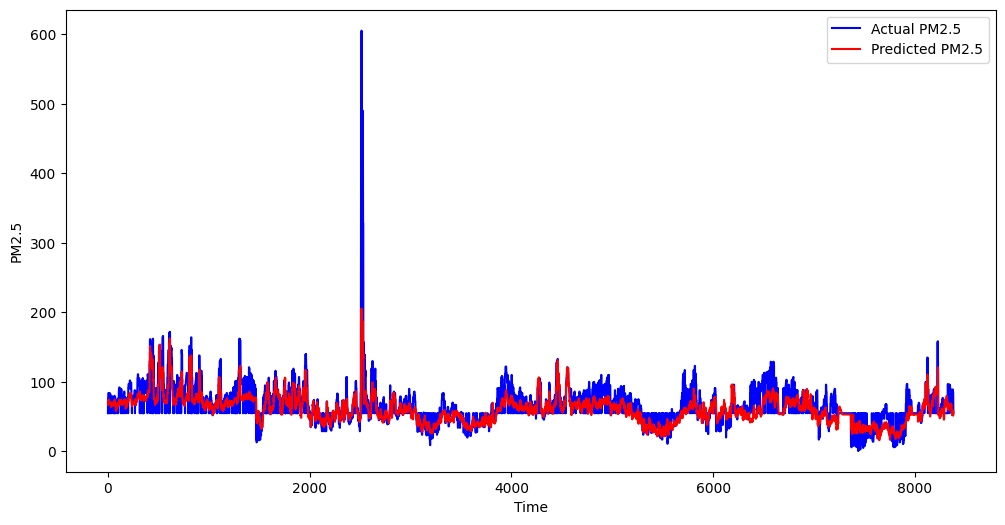

In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled[:, 0], label="Actual PM2.5", color="blue")
plt.plot(y_pred_rescaled[:, 0], label="Predicted PM2.5", color="red")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")


MAE: 7.135594278599216
MSE: 277.5754369135892
RMSE: 16.66059533490893
R2 Score: -8.089326997795932e+24


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1

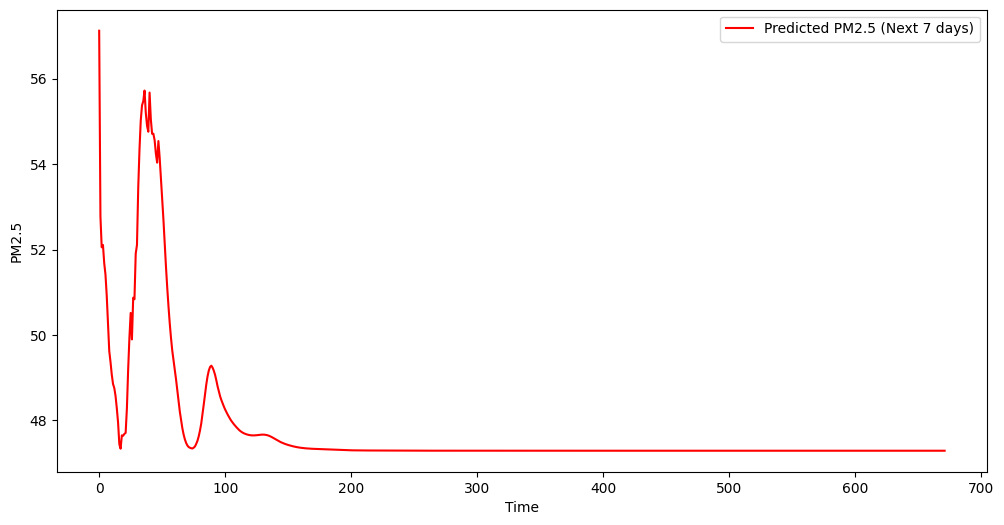

In [ ]:
future_steps = 7 * 96  # 7 days * 96 time intervals (every 15 minutes)
future_predictions = []

input_seq = X_test[-1]  # Start from the last sequence in test data

for _ in range(future_steps):
    pred = model.predict(input_seq.reshape(1, SEQ_LENGTH, -1))[0]
    future_predictions.append(pred)
    input_seq = np.vstack([input_seq[1:], pred])

# Convert predictions back to original scale
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(future_predictions_rescaled[:, 0], label="Predicted PM2.5 (Next 7 days)", color="red")
plt.xlabel("Time")
plt.ylabel("PM2.5")
plt.legend()
plt.show()


In [ ]:
!pip install flask flask-ngrok joblib pandas numpy tensorflow scikit-learn


In [ ]:
from flask import Flask, request, jsonify
import numpy as np
import tensorflow as tf
import joblib
import datetime

app = Flask(__name__)

# Load trained model & scaler
model = tf.keras.models.load_model("bilstm_model (1).h5")
scaler = joblib.load("scaler.pkl")

SEQ_LENGTH = 48  # Sequence length used during training

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    date_input = data.get("date")

    try:
        date_input = datetime.datetime.strptime(date_input, "%Y-%m-%d")
    except:
        return jsonify({"error": "Invalid date format. Use YYYY-MM-DD"})

    # Predict for 96 future time steps (15-minute intervals for 24 hours)
    future_steps = 96
    future_predictions = []
    input_seq = X_test[-1]  # Start with the last known sequence

    for _ in range(future_steps):
        pred = model.predict(input_seq.reshape(1, SEQ_LENGTH, -1))[0]
        future_predictions.append(pred)
        input_seq = np.vstack([input_seq[1:], pred])

    # Rescale predictions back to original values
    future_predictions_rescaled = scaler.inverse_transform(future_predictions)

    predictions_list = []
    for i in range(future_steps):
        time_offset = date_input + datetime.timedelta(minutes=15 * i)
        temp = future_predictions_rescaled[i, -5]
        pm25 = future_predictions_rescaled[i, 0]
        rain = future_predictions_rescaled[i, -2]

        # Your original logic for weather conditions
        weather_condition = "Sunny" if temp > 30 else ("Mild Sunny" if temp > 20 else "Cold")
        if rain > 0:
            weather_condition = "Rainy"

        pm25_status = "Good" if pm25 < 50 else "Unhealthy"

        predictions_list.append({
            "timestamp": time_offset.strftime("%Y-%m-%d %H:%M"),
            "temperature": round(temp, 2),
            "weather": weather_condition,
            "pm2.5": round(pm25, 2),
            "pm2.5_status": pm25_status
        })

    return jsonify({
        "date": date_input.strftime("%Y-%m-%d"),
        "predictions": predictions_list
    })

if __name__ == '__main__':
    app.run(debug=True)


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'bilstm_model (1).h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
import numpy as np
import tensorflow as tf
import joblib
import datetime

# Load trained model & scaler
model = tf.keras.models.load_model("bilstm_model (1).h5")
scaler = joblib.load("scaler.pkl")

SEQ_LENGTH = 48  # Sequence length used during training

# Get user input for date
date_input = input("Enter date (YYYY-MM-DD): ")
try:
    date_input = datetime.datetime.strptime(date_input, "%Y-%m-%d")
except ValueError:
    print("Invalid date format. Use YYYY-MM-DD")
    exit()

# Predict for 96 future time steps (15-minute intervals for 24 hours)
future_steps = 96
future_predictions = []
input_seq = X_test[-1]  # Start with the last known sequence

for _ in range(future_steps):
    pred = model.predict(input_seq.reshape(1, SEQ_LENGTH, -1))[0]
    future_predictions.append(pred)
    input_seq = np.vstack([input_seq[1:], pred])

# Rescale predictions back to original values
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

# Display predictions
print(f"Predictions for {date_input.strftime('%Y-%m-%d')}:\n")
for i in range(future_steps):
    time_offset = date_input + datetime.timedelta(minutes=15 * i)
    temp = future_predictions_rescaled[i, -5]
    pm25 = future_predictions_rescaled[i, 0]
    rain = future_predictions_rescaled[i, -2]

    weather_condition = "Sunny" if temp > 30 else ("Mild Sunny" if temp > 20 else "Cold")
    if rain  < 2:
        weather_condition = "Rainy"

    pm25_status = "Good" if pm25 < 50 else "Unhealthy"

    print(f"{time_offset.strftime('%Y-%m-%d %H:%M')} | Temp: {round(temp, 2)}°C | Weather: {weather_condition} | PM2.5: {round(pm25, 2)} ({pm25_status})")


Enter date (YYYY-MM-DD): 2024-12-12
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━